In [1]:
import sys
import os
import numpy as np
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import datetime
from scipy.stats import kstest
from scipy import signal
import scipy
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
import random

def monta_op(base,primo):
    return base, primo, pow(base,-1,primo)

def opera_int_it_n(ent, base, primo, inv):
    it=0
    while(ent>=primo and it<20):
        unidade=(ent%base)
        ent = unidade*inv+(ent-unidade)//base
        it+=1
    return ent%primo/primo,it

def opera_int_it(ent, base, primo, inv):
    it=0
    while(ent>=primo and it<20):
        unidade=(ent%base)
        ent = unidade*inv+(ent-unidade)//base
        it+=1
    return ent%primo,it

def histograma_distribuição(primo=10,lista=[],tipo=''):
    if(tipo=='primo'):
        if lista==[]:
            print("Calcule algum intervalo antes.")
        else:
            num_bins = primo
            bins = np.arange(primo+1) - 0.5
            n, bins, patches = plt.hist(lista, bins, density=True, facecolor='blue', alpha=0.5, edgecolor = 'black')
            plt.xticks(range(0,primo,primo//5))
            plt.xlim([-1, primo])
            plt.grid(which='major',axis='both')
            plt.savefig('figuras/B'+str(primo)+'T'+str(tamanho)+'I'+str(entrada)+'.png', dpi=300, transparent=False)
            plt.rcParams['figure.dpi'] = 250
            plt.xlabel("Saída")
            plt.ylabel("Frequência relativa")
            plt.show()
            print(n,bins,patches)
    else:
        num_bins = primo
        bins = np.arange(primo+1) - 0.5
        n, bins, patches = plt.hist(lista, bins, density=True, facecolor='blue', alpha=0.5, edgecolor = 'black')
        plt.xticks(range(0,primo,primo//5))
        plt.xlim([-1, primo])
        plt.grid(which='major',axis='both')
        plt.savefig('figuras/LCG.png', dpi=300, transparent=False)
        plt.rcParams['figure.dpi'] = 250
        plt.xlabel("Saída")
        plt.ylabel("Frequência relativa")
        plt.show()
        print(n,bins,patches)

In [2]:
base, primo, inverso = monta_op(10,17431)#6047 bom, 
entrada=primo*111111
tamanho= 100000
seq_calculada=[]
its_calculo=[]
for n in range(entrada,entrada+tamanho,1):
    calc,it1=opera_int_it(n,base,primo,inverso)
    seq_calculada.append(calc);
    its_calculo.append(it1)
print(base, primo, inverso)

10 17431 15688


In [3]:
seq_binaria=[x%2 for x in seq_calculada]
seq_teste=[x*10000/primo for x in seq_calculada]
print(str(len(seq_binaria))+" "+str(seq_binaria.count(1))+" "+str(seq_binaria.count(0))+" "+str(seq_binaria.count(2)))

import csv
with open('resultados-binario.txt', 'w') as f:
    teste=csv.writer(f)
    teste.writerow(seq_binaria)


[0, 8375, 9305, 7694, 15049, 5087, 8751, 14584, 3722, 5325, 14026, 4970, 3537, 4289, 12449, 12180, 12298, 6530, 7620, 8872, 9305, 4482, 13960, 16022, 9259, 203, 11291, 10068, 6532, 6560, 7216, 7741, 14888, 2280, 5854, 14229, 2130, 9853, 4492, 12867, 15049, 12186, 7419, 13441, 7673, 1905, 4966, 10808, 2889, 11431, 5087, 8781, 8887, 11264, 5127, 3490, 12086, 14697, 8380, 6057, 9966, 5376, 13442, 5235, 8683, 4014, 12389, 5122, 2612, 2652, 14584, 8816, 3048, 10600, 13679, 14319, 8984, 17359, 5844, 16678, 3722, 13479, 12004, 11582, 6260, 14635, 7355, 13863, 5584, 13273, 5325, 13372, 3536, 11911, 8641, 4979, 14925, 3910, 9959, 4191]


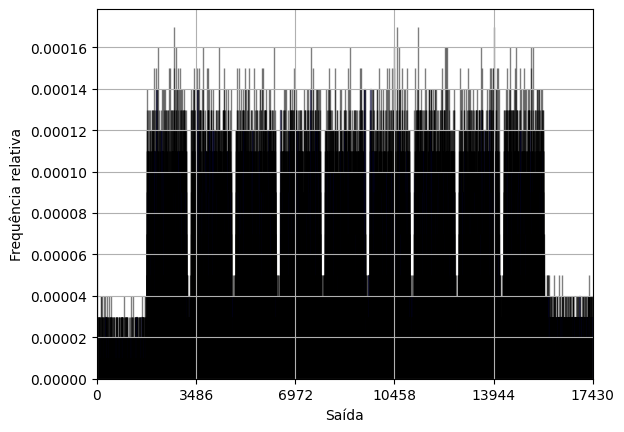

[6.e-05 2.e-05 1.e-05 ... 1.e-05 2.e-05 3.e-05] [-5.00000e-01  5.00000e-01  1.50000e+00 ...  1.74285e+04  1.74295e+04
  1.74305e+04] <BarContainer object of 17431 artists>


In [4]:
histograma_distribuição(int(max(seq_calculada)+1),seq_calculada,'primo')

In [ ]:
i = 0
t2 = 9999
plt.scatter(seq_calculada_norm[i:i+t2],seq_calculada_norm[i+1:i+t2+1], s=10)
plt.rcParams['figure.dpi'] = 250
plt.xlabel("y")
plt.ylabel("y+1")
plt.savefig('figuras/scatter/B'+str(primo)+'scatter'+str(t2+1)+'ini'+str(int(math.log10(entrada)))+'S+'+str(s)+'.png', dpi=600, transparent=False)


In [26]:
seq_calculada_norm = [x/primo for x in seq_calculada]
len(seq_calculada_norm)

100000

In [27]:
len_kstest=500
valoresp_kstest = [kstest(seq_calculada_norm[i*len_kstest:i*len_kstest+len_kstest], 'uniform') for i in range(0,10)]


#print(kstest(seq_calculada_norm[500:1000], 'uniform'))
#[print(x) for x in valoresp_kstest]
vetor_estatistica=[x.statistic for x in valoresp_kstest]
vetor_pvalue=[x.pvalue for x in valoresp_kstest]
print(np.mean(vetor_pvalue))
print(np.mean(vetor_estatistica))
print(vetor_estatistica[:])
print(vetor_pvalue[:])

import csv
with open('resultados-kstest.csv', 'w') as f:
    teste=csv.writer(f)
    teste.writerow(vetor_estatistica)
    teste.writerow(vetor_pvalue)


KstestResult(statistic=0.08203482301646492, pvalue=2.6570966836353995e-06, statistic_location=0.10303482301646492, statistic_sign=-1)


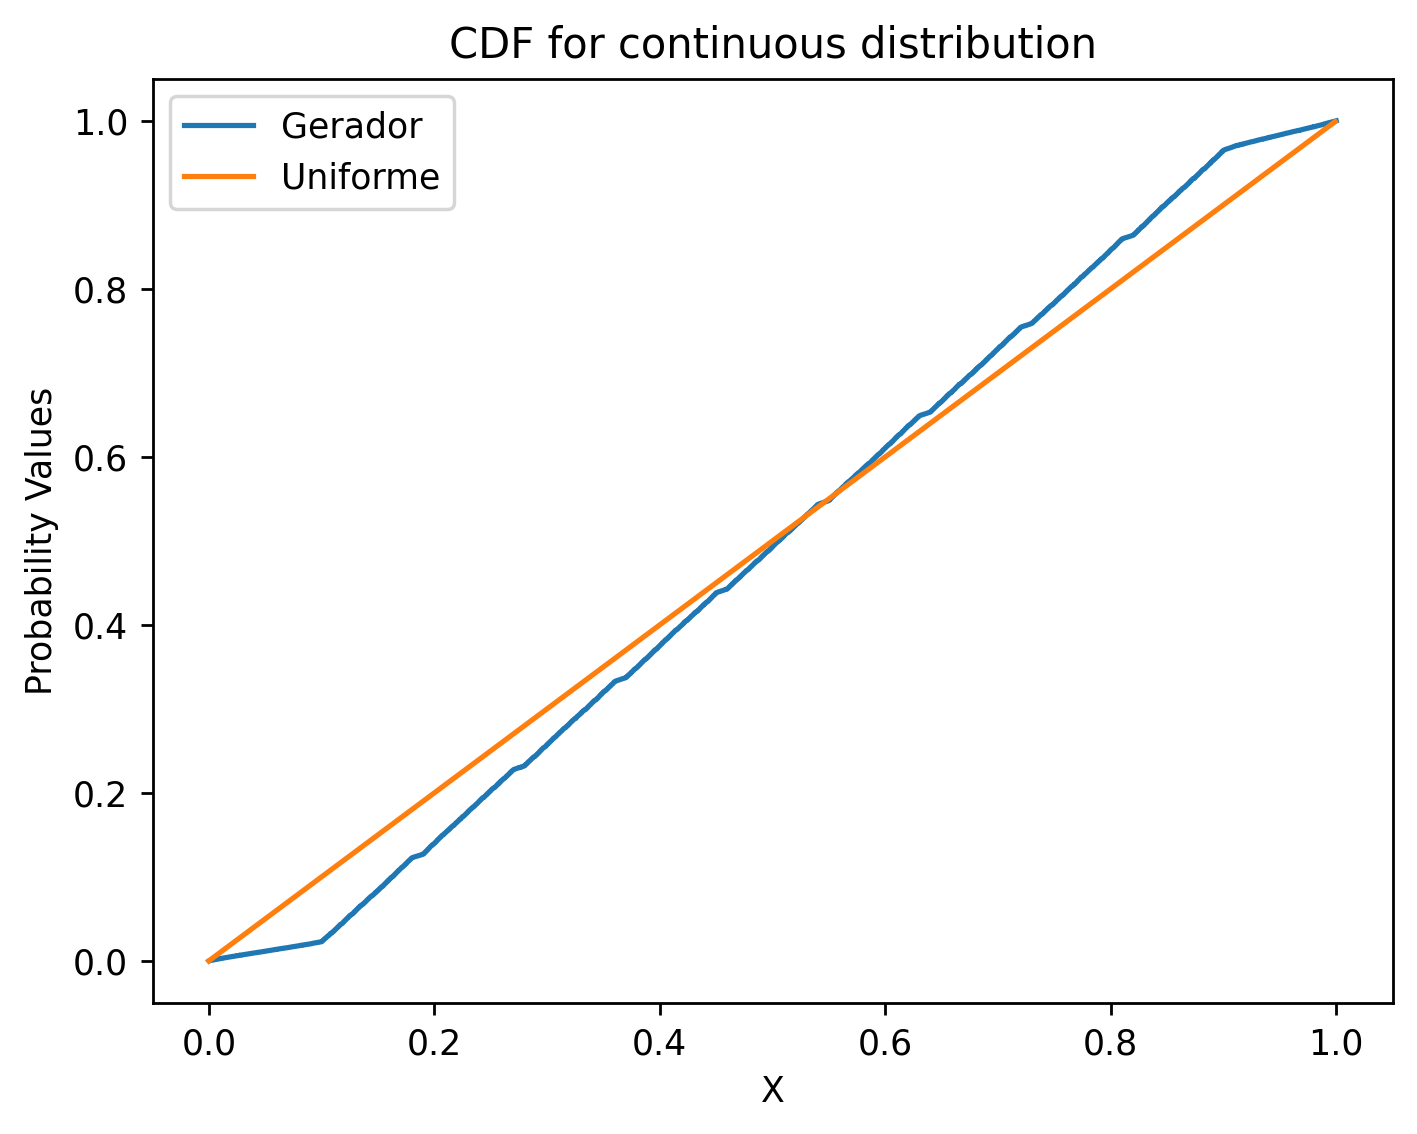

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

seq_calculada_np = np.array(seq_calculada_norm)

sorted_seq = np.sort(seq_calculada_np)
cdf_seq = 1. * np.arange(len(seq_calculada_np)) / (len(seq_calculada_np) - 1)



dx = 0.001
x = np.arange(0, 1, dx)
y = uniform.cdf(x, 0, 1)


plt.plot(sorted_seq,cdf_seq,label="Gerador")
plt.plot(x,y,label="Uniforme")
plt.xlabel("X")
plt.ylabel("Probability Values")
plt.title("CDF for continuous distribution")
plt.legend()
plt.savefig('figuras/CDFB'+str(primo)+'T'+str(len(seq_calculada_norm))+'.png', dpi=300, transparent=False)
plt.show()

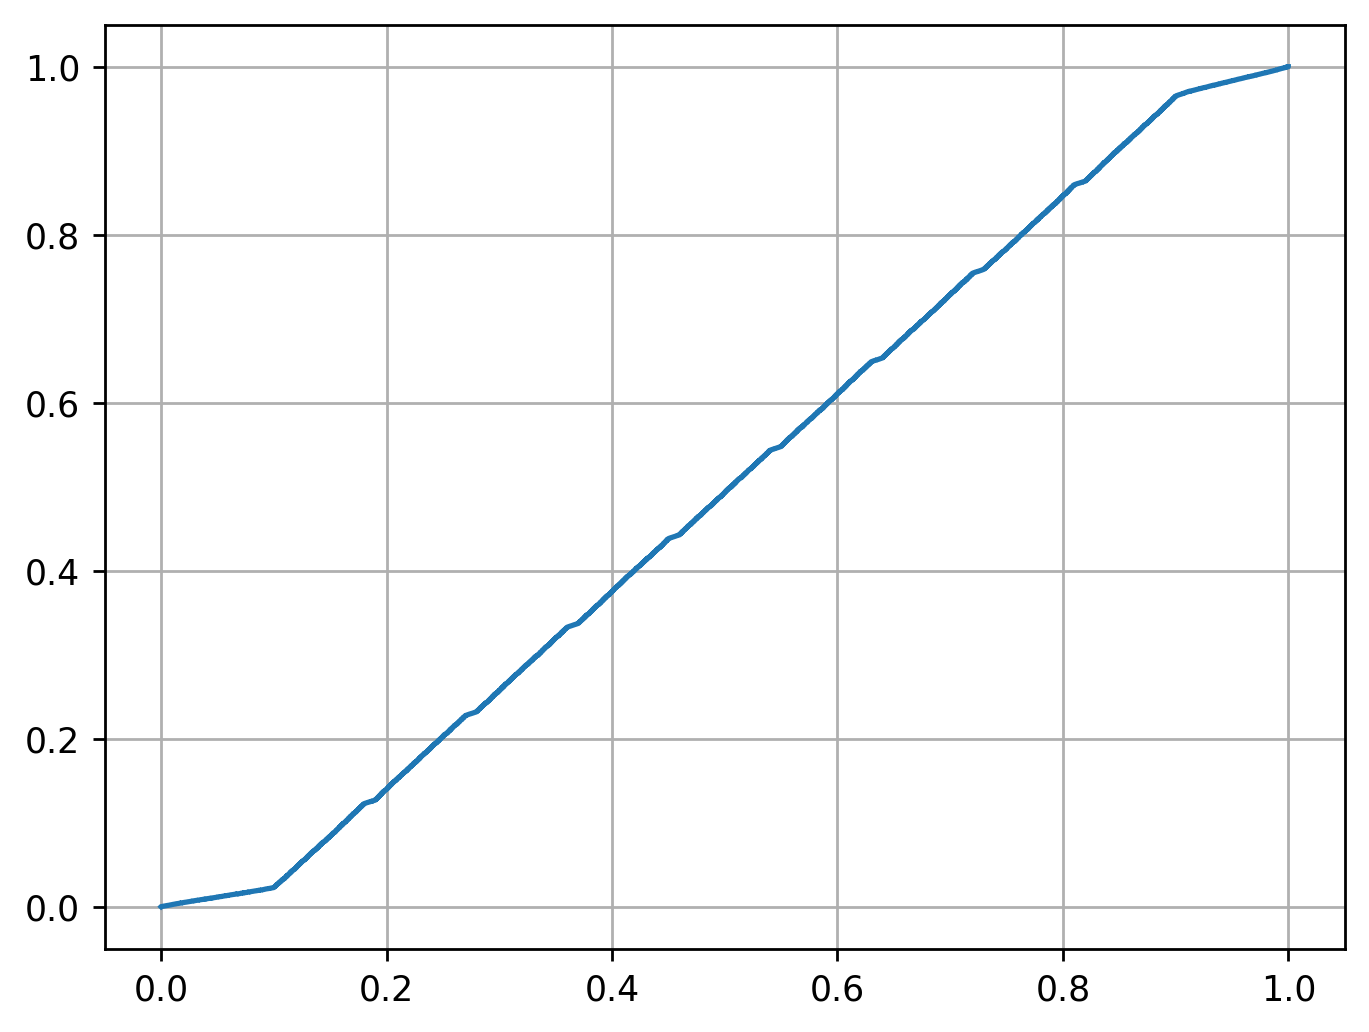

In [29]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def plot_ecdf(a):
    x, y = ecdf(a)
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    plt.savefig('ecdf.png')
    
plot_ecdf(seq_calculada_np)


In [31]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

rng.current = 589

In [32]:
lcg = np.array([rng() for i in range(100000)])

print(np.mean(lcg))
print(np.std(lcg))

0.4974934762614593
0.2889668828063303


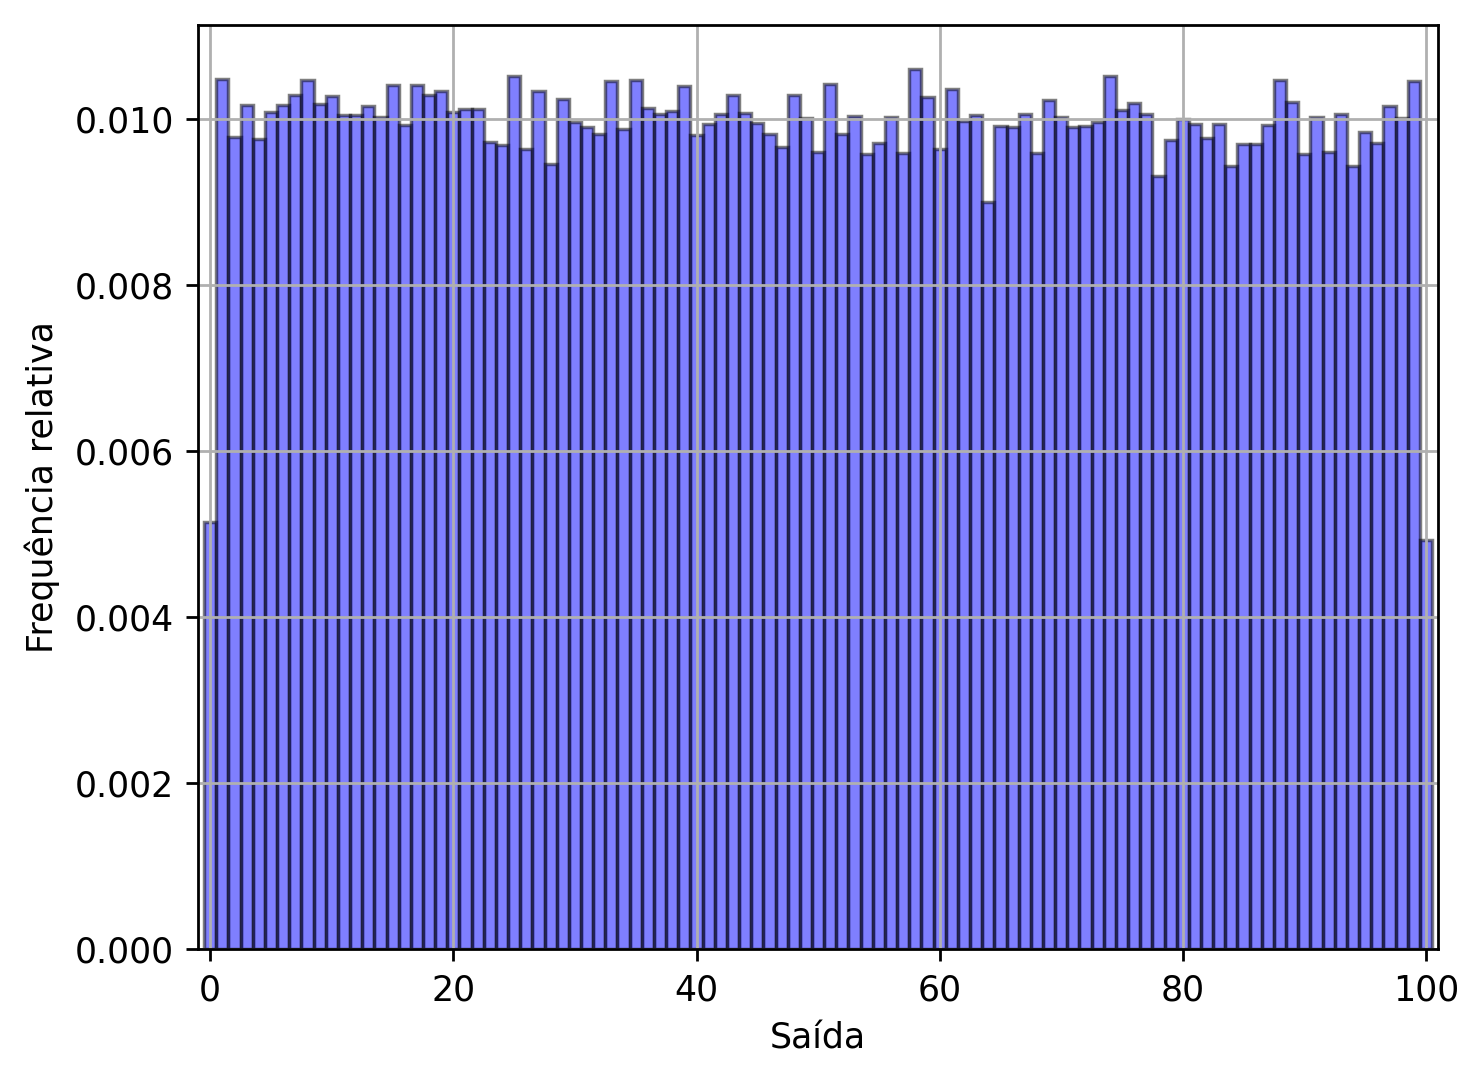

[0.00514 0.01048 0.00978 0.01016 0.00976 0.01008 0.01017 0.01028 0.01047
 0.01018 0.01027 0.01004 0.01004 0.01015 0.01002 0.01041 0.00992 0.0104
 0.01028 0.01033 0.01008 0.01011 0.01012 0.00972 0.00968 0.01051 0.00963
 0.01033 0.00945 0.01024 0.00996 0.0099  0.00981 0.01045 0.00988 0.01046
 0.01013 0.01006 0.01009 0.01039 0.0098  0.00994 0.01005 0.01029 0.01007
 0.00995 0.00982 0.00966 0.01028 0.01001 0.0096  0.01042 0.00981 0.01003
 0.00957 0.00971 0.01002 0.00958 0.0106  0.01026 0.00963 0.01036 0.00997
 0.01004 0.009   0.00991 0.0099  0.01006 0.00958 0.01022 0.01002 0.0099
 0.00991 0.00996 0.01051 0.0101  0.01019 0.01006 0.00931 0.00974 0.00999
 0.00993 0.00977 0.00994 0.00943 0.0097  0.00969 0.00992 0.01047 0.0102
 0.00957 0.01002 0.0096  0.01005 0.00943 0.00984 0.00971 0.01015 0.01001
 0.01045 0.00493] [ -0.5   0.5   1.5   2.5   3.5   4.5   5.5   6.5   7.5   8.5   9.5  10.5
  11.5  12.5  13.5  14.5  15.5  16.5  17.5  18.5  19.5  20.5  21.5  22.5
  23.5  24.5  25.5  26.5  27.5  28.5

In [33]:
histograma_distribuição(int(max(lcg*100))+2,lcg*100,'LCG')

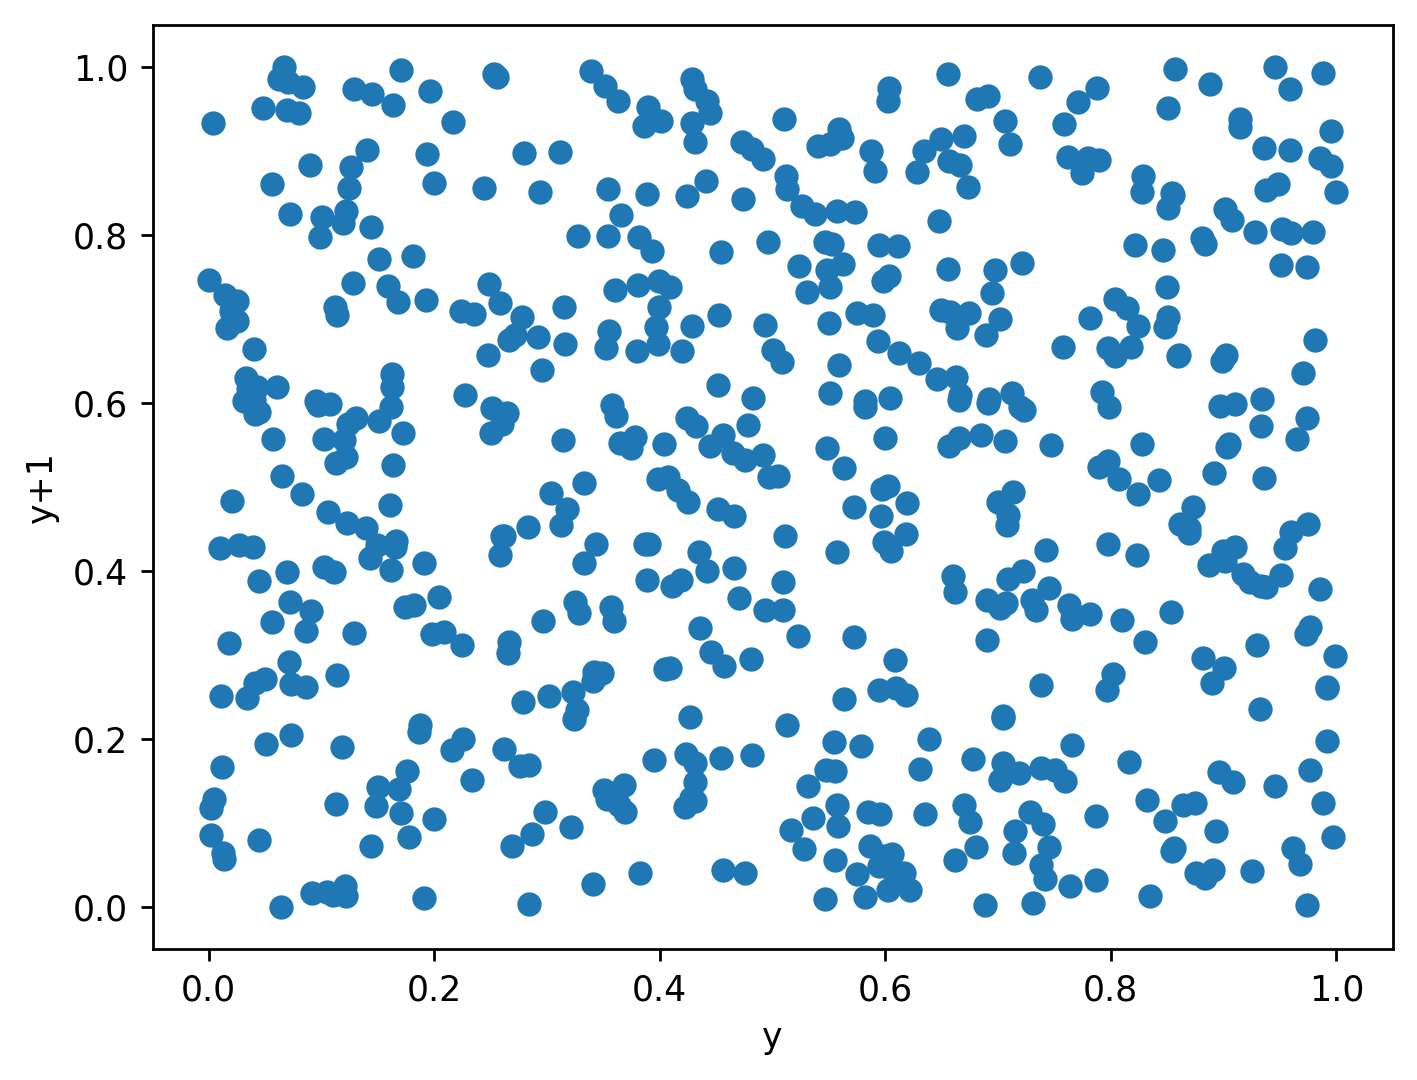

In [36]:
i = 9000
t1 = 600
plt.scatter(lcg[i:i+t1],lcg[i+1:i+t1+1])
plt.rcParams['figure.dpi'] = 250
plt.xlabel("y")
plt.ylabel("y+1")
plt.savefig('figuras/LCGscatter'+str(t1)+'.png', dpi=300, transparent=False)


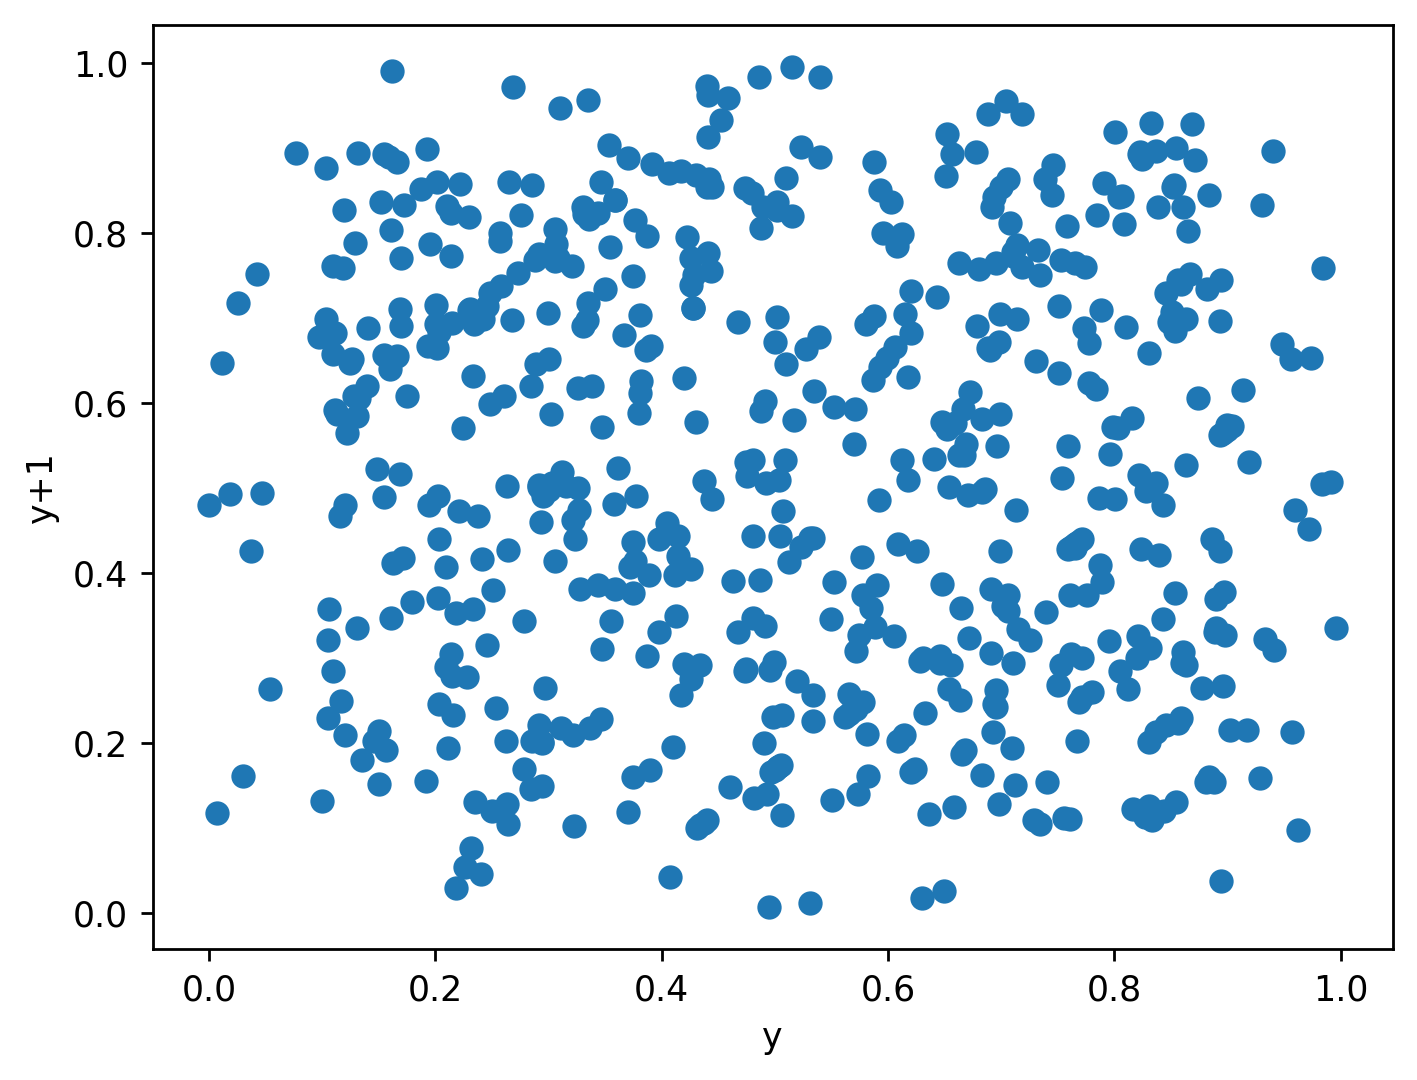

In [37]:
i = 0
t2 = 600
plt.scatter(seq_calculada_norm[i:i+t2],seq_calculada_norm[i+1:i+t2+1])
plt.rcParams['figure.dpi'] = 250
plt.xlabel("y")
plt.ylabel("y+1")
plt.savefig('figuras/B'+str(primo)+'scatter'+str(t2)+'.png', dpi=300, transparent=False)
